# Predicting Board Games Reviews

### In this project we are going to first, see how to pick a metric error for our model, we are going to work with clusters and check for correlations, and finally we will create a model for our predictions. 

In [1]:
import pandas as pd
import csv

board_games = pd.read_csv("board_games.csv")
board_games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [15]:
board_games.shape

(81312, 20)

In [19]:
board_games = board_games.dropna(axis=0)

In [20]:
board_games.shape

(81268, 20)

In [22]:
board_games = board_games[board_games['users_rated'] > 0]

In [23]:
board_games.shape

(56894, 20)

 # Picking An Error Metric


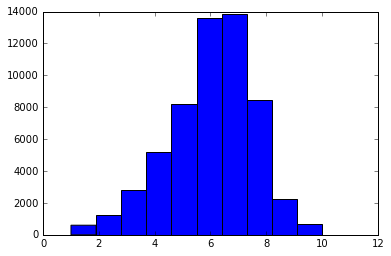

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.hist(board_games['average_rating'])
plt.show()

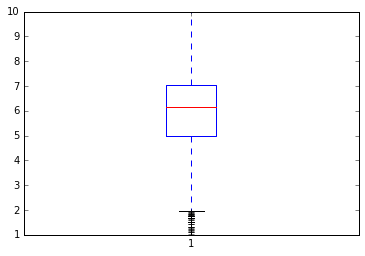

In [28]:
plt.boxplot(board_games['average_rating'])
plt.show()

In [30]:
print(board_games['average_rating'].std())
print(board_games['average_rating'].mean())

1.57882993483
6.01611284933


- AS the data is continous using mean square error makes sense. 

- But it is not the only possibility, as it is a linear regression and we want to meassure the distance between the actual value and the predicted one, we can also use, mean square and mean median errors.

- DEFINETLY NOT to use AUC or any other classification error metric cause this is not the case we are going to work in.

# Plotting Clusters

In [2]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters = 5)

numeric_columns = board_games.iloc[:, 3:]
numeric_columns.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [41]:
kmeans.fit(numeric_columns)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [43]:
labels = kmeans.labels_
print(labels)

[1 1 1 ..., 0 0 0]


In [46]:
game_mean = numeric_columns.apply(np.mean, axis = 1)
game_mean.head()

0    3806.296359
1    2662.195541
2    1979.243229
3    2467.201242
4    6360.675421
dtype: float64

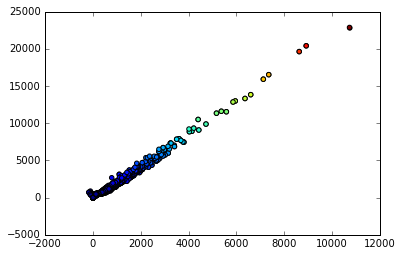

In [47]:
game_std = numeric_columns.apply(np.std, axis = 1)

plt.scatter(x=game_mean, y=game_std, c=game_std)
plt.show()

### Results:
    - We can see that there are few games that are played by a lot of players. Most games dont get played that much but a few get plaed by a lot of players.

# Finding Correlations

In [49]:
correlations = numeric_columns.corr()

correlations['average_rating']

yearpublished           0.108461
minplayers             -0.032701
maxplayers             -0.008335
playingtime             0.048994
minplaytime             0.043985
maxplaytime             0.048994
minage                  0.210049
users_rated             0.112564
average_rating          1.000000
bayes_average_rating    0.231563
total_owners            0.137478
total_traders           0.119452
total_wanters           0.196566
total_wishers           0.171375
total_comments          0.123714
total_weights           0.109691
average_weight          0.351081
Name: average_rating, dtype: float64

- We can see that average_weight is highly correlated with average_rating, also, yearspublished has a good correlation which indicates that new games get better ratings. Another example is minage, as it is bigger has more rating.

In [62]:
cols_dont_corr = list(numeric_columns.columns)
cols_dont_corr.remove('bayes_average_rating')
cols_dont_corr.remove('average_rating')
# This columns are eliminated because seems that they do not correlate with average_rating

corr_cols = cols_dont_corr


# Creating A Model

- Lets create a linear regression model and make some predictions about the  data.

In [66]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(board_games[corr_cols], board_games['average_rating'])
predictions = lr.predict(board_games[corr_cols])

mse = np.mean((predictions - board_games['average_rating']) ** 2)

In [67]:
print(mse)

2.09339697583


- Our ERROR here is very close to the standard deviation, which means that our model does not predict well.